In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read dataset
df = pd.read_csv("adult.csv")

# Quick look
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Basic shape
print("Rows, Columns:", df.shape)

# Column names
print(df.columns.tolist())

# Data types and missing overview
df.info()


Rows, Columns: (48842, 15)
['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842

In [4]:
# Quick summary (numeric)
df.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Check unique values count (helps spot messy columns)
df.nunique().sort_values(ascending=False)


fnlwgt             28523
capital-gain         123
capital-loss          99
hours-per-week        96
age                   74
native-country        42
education             16
educational-num       16
occupation            15
workclass              9
marital-status         7
relationship           6
race                   5
gender                 2
income                 2
dtype: int64

In [6]:
# Count '?' occurrences per column
q_counts = (df == "?").sum().sort_values(ascending=False)
q_counts


occupation         2809
workclass          2799
native-country      857
fnlwgt                0
education             0
educational-num       0
age                   0
marital-status        0
relationship          0
gender                0
race                  0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64

In [7]:
# Replace '?' with NaN
df = df.replace("?", np.nan)

# Strip whitespace for object columns
obj_cols = df.select_dtypes(include="object").columns
for c in obj_cols:
    df[c] = df[c].astype(str).str.strip()

df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,nan,103497,Some-college,10,Never-married,nan,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
# Missing values count
missing = df.isna().sum().sort_values(ascending=False)
missing


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
# Replace '?' with NaN
df = df.replace("?", np.nan)

# Strip whitespace for object columns
obj_cols = df.select_dtypes(include="object").columns
for c in obj_cols:
    df[c] = df[c].astype(str).str.strip()

df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,nan,103497,Some-college,10,Never-married,nan,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
# Missing values count
missing = df.isna().sum().sort_values(ascending=False)
missing


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
# Drop rows with missing values in key categorical columns
key_cols = ["workclass", "occupation", "native-country"]
df_clean = df.dropna(subset=key_cols).copy()

print("Before:", df.shape, "After:", df_clean.shape)



Before: (48842, 15) After: (48842, 15)


In [12]:
# Fill missing categorical values with mode (most frequent)
df_filled = df.copy()
for c in obj_cols:
    if df_filled[c].isna().sum() > 0:
        df_filled[c] = df_filled[c].fillna(df_filled[c].mode()[0])

print("Missing after fill:", df_filled.isna().sum().sum())


Missing after fill: 0


In [13]:
# Check duplicate rows
dup_count = df_clean.duplicated().sum()
print("Duplicate rows:", dup_count)

# Optionally drop duplicates
df_clean = df_clean.drop_duplicates()
print("Shape after dropping duplicates:", df_clean.shape)


Duplicate rows: 52
Shape after dropping duplicates: (48790, 15)


In [14]:
# Target distribution
df_clean["income"].value_counts()


income
<=50K    37109
>50K     11681
Name: count, dtype: int64

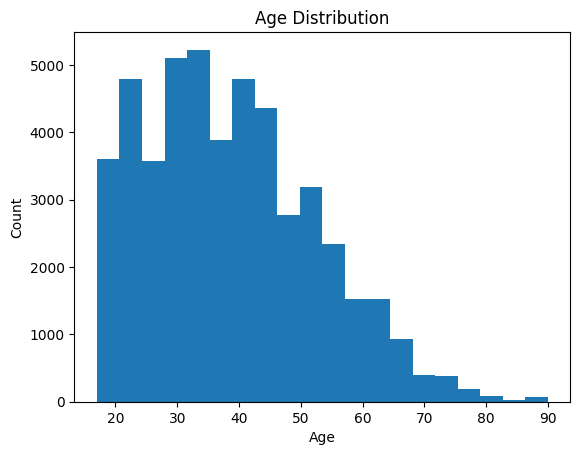

In [15]:
# Age distribution
plt.figure()
plt.hist(df_clean["age"], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


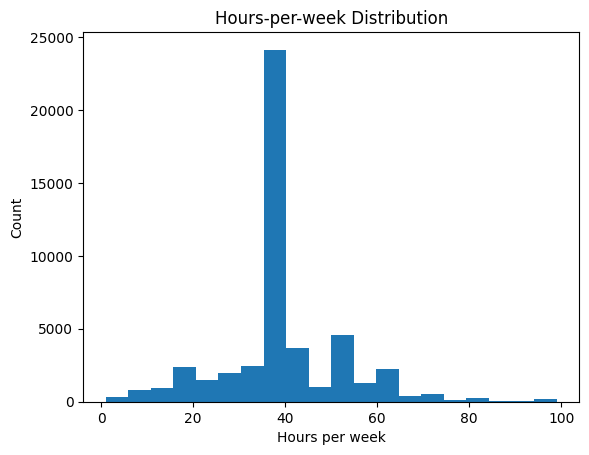

In [16]:
# Hours per week distribution
plt.figure()
plt.hist(df_clean["hours-per-week"], bins=20)
plt.title("Hours-per-week Distribution")
plt.xlabel("Hours per week")
plt.ylabel("Count")
plt.show()


In [17]:
# Grouped means by income
df_clean.groupby("income")[["age", "hours-per-week"]].mean().round(2)


,age,hours-per-week
income,,
<=50K,36.88,38.84
>50K,44.28,45.45


In [18]:
# Income distribution by gender
pd.crosstab(df_clean["gender"], df_clean["income"], normalize="index").round(3)


income,<=50K,>50K
gender,,
Female,0.891,0.109
Male,0.696,0.304


In [19]:
# Income distribution by education (row-normalized)
edu_income = pd.crosstab(df_clean["education"], df_clean["income"], normalize="index")
edu_income.sort_values(by=">50K", ascending=False).head(10).round(3)


income,<=50K,>50K
education,,
Prof-school,0.260,0.740
Doctorate,0.274,0.726
Masters,0.451,0.549
Bachelors,0.587,0.413
Assoc-acdm,0.742,0.258
Assoc-voc,0.747,0.253
Some-college,0.810,0.190
HS-grad,0.841,0.159
12th,0.927,0.073


In [20]:
# Income distribution by marital-status
mar_income = pd.crosstab(df_clean["marital-status"], df_clean["income"], normalize="index")
mar_income.sort_values(by=">50K", ascending=False).round(3)


income,<=50K,>50K
marital-status,,
Married-civ-spouse,0.554,0.446
Married-AF-spouse,0.622,0.378
Divorced,0.899,0.101
Married-spouse-absent,0.907,0.093
Widowed,0.916,0.084
Separated,0.935,0.065
Never-married,0.954,0.046


In [21]:
# Basic stats for capital gain/loss
df_clean[["capital-gain", "capital-loss"]].describe()


,capital-gain,capital-loss
count,48790.000000,48790.000000
mean,1080.217688,87.595573
std,7455.905921,403.209129
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,4356.000000


In [22]:
# How many zeros?
zero_gain = (df_clean["capital-gain"] == 0).mean()
zero_loss = (df_clean["capital-loss"] == 0).mean()
print("Zero capital-gain ratio:", round(zero_gain, 3))
print("Zero capital-loss ratio:", round(zero_loss, 3))


Zero capital-gain ratio: 0.917
Zero capital-loss ratio: 0.953


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


In [24]:
# Define X and y
X = df_clean.drop(columns=["income"]).copy()
y = df_clean["income"].copy()

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

print("Categorical:", cat_cols)
print("Numeric:", num_cols)


Categorical: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
Numeric: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocess: one-hot for categorical, pass-through for numeric
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

# Simple model
model = LogisticRegression(max_iter=200)

# Pipeline
clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])

# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))


Accuracy: 0.7976
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      7422
        >50K       0.66      0.32      0.43      2336

    accuracy                           0.80      9758
   macro avg       0.74      0.63      0.65      9758
weighted avg       0.78      0.80      0.77      9758



c:\Users\f-moharami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
